<a href="https://colab.research.google.com/github/williamdavidona/Time-Series-Models/blob/main/time_series_oil_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [58]:
data = pd.read_csv('crudeoilprice.csv')
data.head()

,date,price,percentChange,change
0,1983-03-30T00:00:00,29.27,NaN,NaN
1,1983-04-04T00:00:00,30.63,4.646,1.36
2,1983-05-02T00:00:00,30.25,-1.241,-0.38
3,1983-06-01T00:00:00,31.38,3.736,1.13
4,1983-07-01T00:00:00,32.00,1.976,0.62


In [59]:
data.columns

Index(['date', 'price', 'percentChange', 'change'], dtype='object')

In [60]:
data = data.drop(columns= ['percentChange', 'change'])

##Data preprocessing

verify the variables types, if the date format is object, it should change to datetime 

In [6]:
data.columns


Index(['date', 'price'], dtype='object')

In [7]:
data.dtypes

date      object
price    float64
dtype: object

In [61]:
data['date']= pd.to_datetime(data['date'])


In [ ]:
data['date'].asfreq('d')

1970-01-01   NaT
Freq: D, Name: date, dtype: datetime64[ns]

In [9]:
data.dtypes

date     datetime64[ns]
price           float64
dtype: object

In [10]:
data = data.set_index('date')
data.head()

,price
date,
1983-03-30,29.27
1983-04-04,30.63
1983-05-02,30.25
1983-06-01,31.38
1983-07-01,32.00


In [11]:
pd.date_range(data.index.min(), data.index.max(), freq='M').difference(data.index)

DatetimeIndex(['1983-03-31', '1983-04-30', '1983-05-31', '1983-06-30',
               '1983-07-31', '1983-08-31', '1983-09-30', '1983-10-31',
               '1983-11-30', '1983-12-31',
               ...
               '2022-07-31', '2022-08-31', '2022-09-30', '2022-10-31',
               '2022-11-30', '2022-12-31', '2023-01-31', '2023-02-28',
               '2023-03-31', '2023-04-30'],
              dtype='datetime64[ns]', length=482, freq=None)

the date must be index in data frame

In [ ]:
data.index.freq = pd.infer_freq(data.index)

descomponer la serie temporal

In [12]:
data.head()

,price
date,
1983-03-30,29.27
1983-04-04,30.63
1983-05-02,30.25
1983-06-01,31.38
1983-07-01,32.00


In [36]:
data.tail()

,price
date,
2023-01-03,79.1700
2023-02-01,77.1900
2023-03-01,75.8000
2023-04-03,76.7800
2023-05-01,68.0363


In [123]:
data = data.groupby('date')['price'].sum()
data.head()

date
1983-03-30    29.27
1983-04-04    30.63
1983-05-02    30.25
1983-06-01    31.38
1983-07-01    32.00
Name: price, dtype: float64

In [124]:
oilprice = data.reset_index().set_index('date')

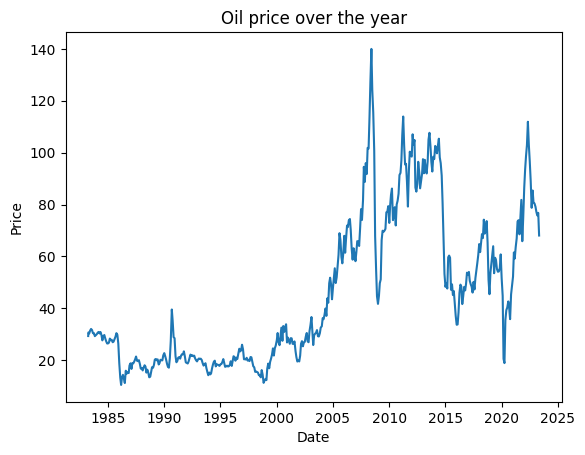

In [64]:
plt.title('Oil price over the year')
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(oilprice)

<Axes: xlabel='date'>

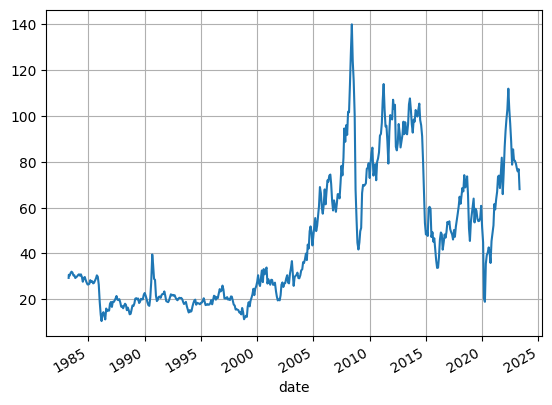

In [39]:
from datetime import datetime
start_date = datetime(1983,3,30)
end_date = datetime(2023,5,1)
data[(start_date <= data.index) & (data.index <= end_date)].plot(grid='on')

In [65]:

rolling_mean_oilprice = oilprice.rolling(window=2).mean()
rolling_std_oilprice = oilprice.rolling(window=2).std()

<Axes: xlabel='date'>

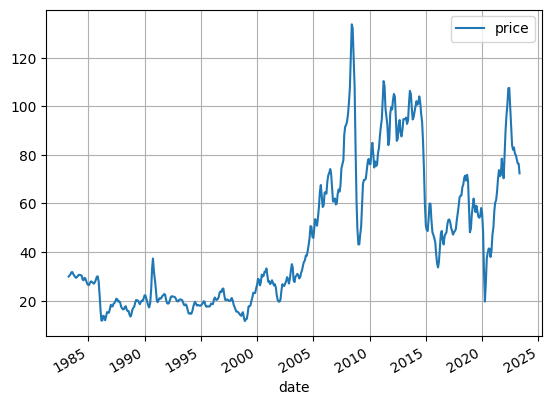

In [66]:
rolling_mean_oilprice.plot(grid='on')

<Axes: xlabel='date'>

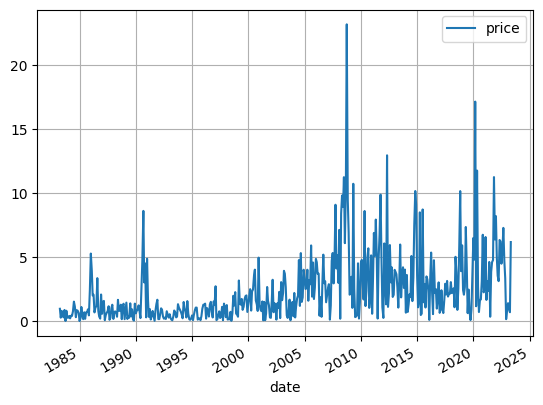

In [67]:
rolling_std_oilprice.plot(grid='on')

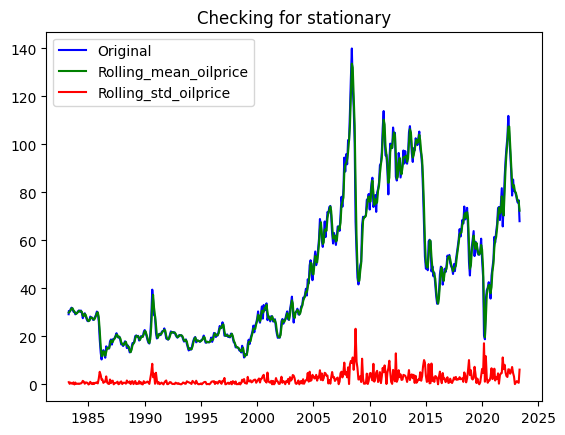

In [69]:
original = plt.plot(oilprice, color = 'blue', label = 'Original')
rolling_mean_plot = plt.plot(rolling_mean_oilprice, color = 'green', label = 'Rolling_mean_oilprice')
rolling_std_plot = plt.plot(rolling_std_oilprice, color = 'red', label = 'Rolling_std_oilprice')
plt.title('Checking for stationary')
plt.legend(loc = 'best')

#The trend

In [27]:
import numpy as np

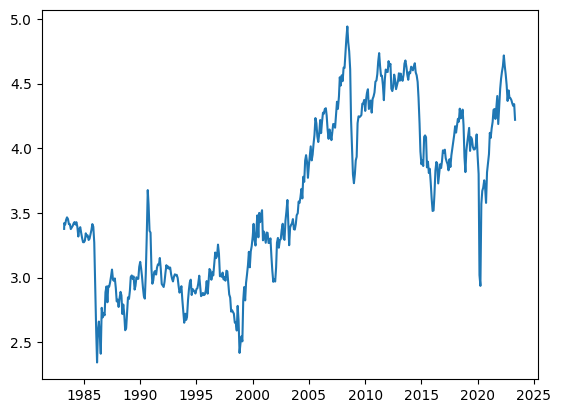

In [70]:
data_log = np.log(oilprice)
plt.plot(data_log)

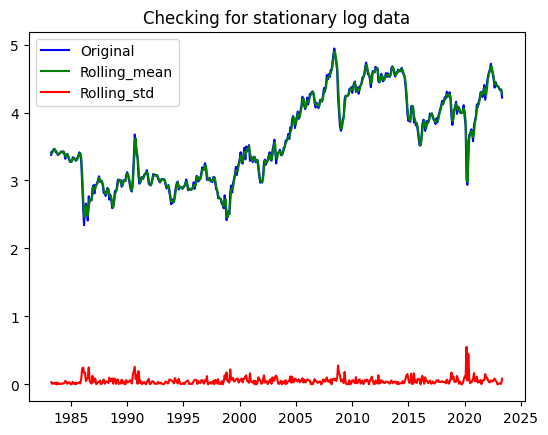

In [71]:
rolling_mean_oilprice_log = data_log.rolling(window=2).mean()
rolling_std_oilprice_log = data_log.rolling(window=2).std()
original = plt.plot(data_log, color = 'blue', label = 'Original')
rolling_mean_plot_log = plt.plot(rolling_mean_oilprice_log, color = 'green', label = 'Rolling_mean')
rolling_std_plot_log = plt.plot(rolling_std_oilprice_log, color = 'red', label = 'Rolling_std')
plt.title('Checking for stationary log data')
plt.legend(loc = 'best')

<Axes: xlabel='date'>

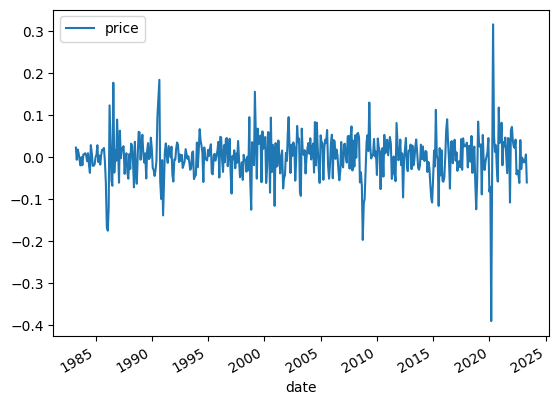

In [72]:
data_log_moving_average = data_log - rolling_mean_oilprice_log
data_log_moving_average = data_log_moving_average.dropna()
data_log_moving_average.plot()

In [73]:
from statsmodels.tsa.stattools import adfuller
def Stationary_Test(data):
    data = data.groupby('date')['price'].sum().reset_index().set_index('date')
    Moving_Average = data.rolling(window=2).mean()
    Moving_STD = data.rolling(window=2).std()
    original = plt.plot(data, color = 'blue', label = 'Original')
    Moving_Average_Plot = plt.plot(Moving_Average, color = 'green', label = 'Rolling_mean')
    Moving_STD_plot = plt.plot(Moving_STD, color = 'red', label = 'Rolling_std')
    plt.title('Checking for stationary log data')
    plt.legend(loc = 'best')
    from statsmodels.tsa.stattools import adfuller
    test = adfuller(data['price'], autolag= 'AIC')
    OUTPUT = pd.Series(test[0:4], index = ['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,price in test[4].items():
        OUTPUT['Critical Value (%s)'%key] = price
    print(OUTPUT)

Test Statistic                -1.216067e+01
p-value                        1.496238e-22
#Lags Used                     3.000000e+00
Number of Observations Used    4.780000e+02
Critical Value (1%)           -3.444105e+00
Critical Value (5%)           -2.867606e+00
Critical Value (10%)          -2.570001e+00
dtype: float64


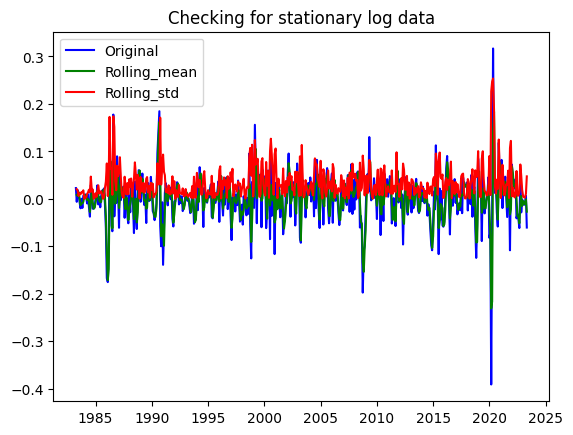

In [74]:
Stationary_Test(data_log_moving_average)

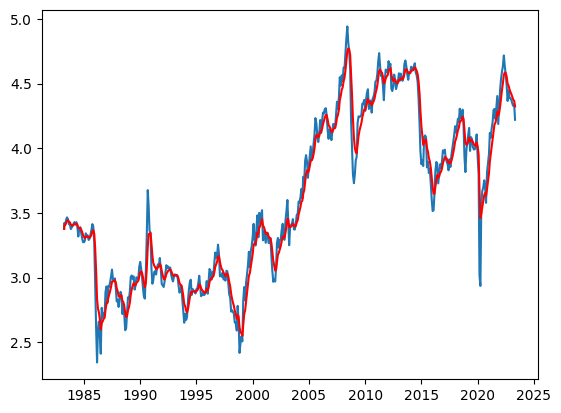

In [75]:
weighted_average = data_log.ewm(halflife=2,min_periods=0,adjust=True).mean()
plt.plot(data_log)
plt.plot(weighted_average,color = 'red')

Test Statistic                -1.010875e+01
p-value                        1.013422e-17
#Lags Used                     1.000000e+00
Number of Observations Used    4.810000e+02
Critical Value (1%)           -3.444018e+00
Critical Value (5%)           -2.867568e+00
Critical Value (10%)          -2.569980e+00
dtype: float64


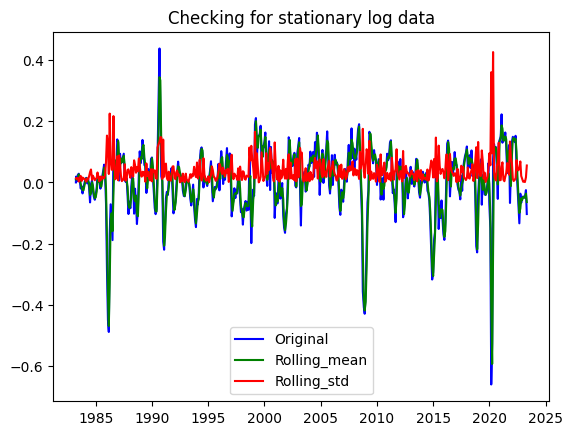

In [76]:
data_log_minus_weighted_average = data_log-weighted_average
Stationary_Test(data_log_minus_weighted_average)

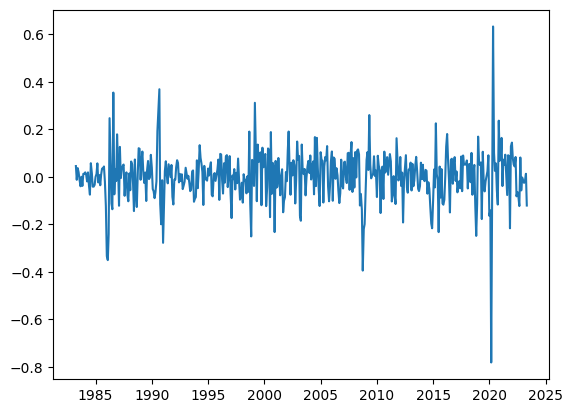

In [77]:
datasetlogdiffshifting = data_log - data_log.shift()
plt.plot(datasetlogdiffshifting)

Test Statistic                -1.216067e+01
p-value                        1.496238e-22
#Lags Used                     3.000000e+00
Number of Observations Used    4.780000e+02
Critical Value (1%)           -3.444105e+00
Critical Value (5%)           -2.867606e+00
Critical Value (10%)          -2.570001e+00
dtype: float64


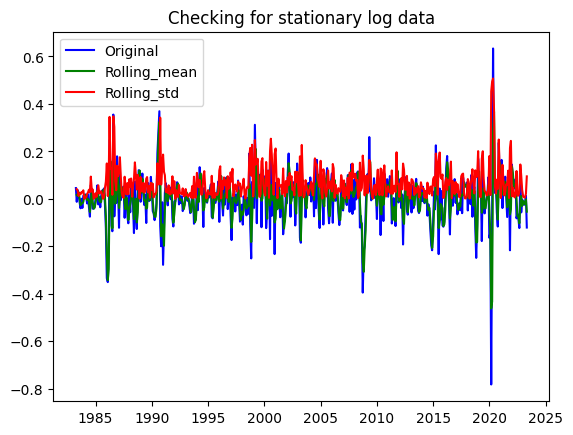

In [78]:
data_log_logdiffshifting = datasetlogdiffshifting.dropna()
Stationary_Test(data_log_logdiffshifting)

In [96]:
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

In [87]:
from statsmodels.tsa.stattools import acf, pacf
def autocorrelation(data):
    data = data.groupby('date')['price'].sum().reset_index().set_index('date')
    lag_acf = acf(data, nlags=25)
    lag_pacf = pacf(data, nlags=25, method='ols')
    # Plot ACF
    plt.subplot(121)
    plt.plot(lag_acf)
    plt.axhline(y=0,linestyle = '--',color = 'red')
    plt.axhline(y = -1.96/np.sqrt(len(data)),linestyle = '--', color = 'gray')
    plt.axhline(y = 1.96/np.sqrt(len(data)),linestyle = '--', color = 'gray')
    plt.title('Autocorrelation Function')
    # Plot PACF
    plt.subplot(122)
    plt.plot(lag_pacf)
    plt.axhline(y=0,linestyle = '--',color = 'red')
    plt.axhline(y = -1.96/np.sqrt(len(data)),linestyle = '--', color = 'gray')
    plt.axhline(y = 1.96/np.sqrt(len(data)),linestyle = '--', color = 'gray')
    plt.title('Partial Autocorrelation Function')

In [94]:
from statsmodels.tsa.arima.model import ARIMA
def arima_model(data, p, d, q):
    x = data['price'].values
    size = int(len(x)*0.9)
    train = x[0:size]
    test = x[size:len(x)]
    training_data = [x for x in train]
    model_prediction=[]
    
    for x in range(len(test)):
        model = ARIMA(training_data, order=(p, d, q))
        fitted_model = model.fit()
        yhat = fitted_model.forecast()
        model_prediction.append(yhat[0])
        observetion = test[x]
        training_data.append(observetion)
        print(f'predicted={yhat[0]}, expected={observetion}')
    
    rmse = sqrt(mean_squared_error(test, model_prediction))
    print(f'\nThe RMSE for this ARIMA model is {rmse}')
    print()
    
    print(fitted_model.summary())
    
    residuals = pd.DataFrame(fitted_model.resid)
    residuals.plot()
    plt.show()
    
    residuals.plot(kind='kde')
    plt.show()

In [178]:
def forecast(data, p, d, q, t):
    price = data['price'].values
    date  = data['date']
    historIcal_value = price.tolist()
    period = date.tolist()
    forcasted_values = []
    forcasted_period = []
    for x in range(t):
        forcasted_period.append(2015+x)
        model = ARIMA(historIcal_value, order=(p, d, q))
        fitted_model = model.fit()
        yhat = fitted_model.forecast()
        forcasted_values.append(yhat[0])
        historIcal_value.append(yhat[0])
        plt.figure(figsize=(10, 5))
    plt.plot(period, price, label='CO2 Emission upto 2019')
    plt.plot(forcasted_period, forcasted_values, label='CO2 Emission forcasted 2019')
    plt.legend()
    plt.show()

In [167]:
data= pd.read_csv('crudeoilprice.csv')
data['date']= pd.to_datetime(data['date'])
data.head()

,date,price,percentChange,change
0,1983-03-30,29.27,NaN,NaN
1,1983-04-04,30.63,4.646,1.36
2,1983-05-02,30.25,-1.241,-0.38
3,1983-06-01,31.38,3.736,1.13
4,1983-07-01,32.00,1.976,0.62


In [160]:
data['date'] = data ['date'].dt.to_period('m')
data['date'].head()

0    1983-03
1    1983-04
2    1983-05
3    1983-06
4    1983-07
Name: date, dtype: period[M]

In [161]:
data.head()

,date,price,percentChange,change
0,1983-03,29.27,NaN,NaN
1,1983-04,30.63,4.646,1.36
2,1983-05,30.25,-1.241,-0.38
3,1983-06,31.38,3.736,1.13
4,1983-07,32.00,1.976,0.62


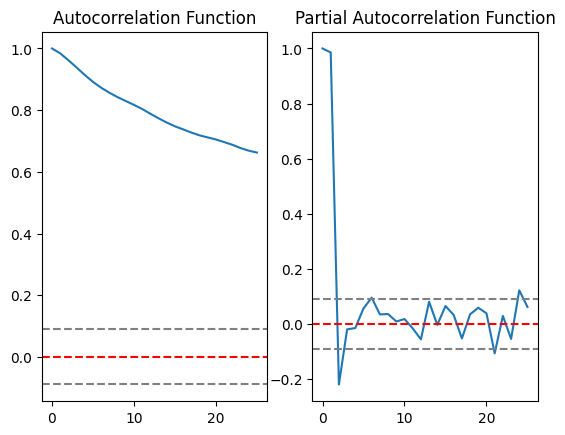

In [168]:
autocorrelation(data)

predicted=64.85967177191101, expected=53.5
predicted=51.337034635857066, expected=59.4601
predicted=59.9647528028249, expected=58.58
predicted=59.01790146203434, expected=55.1
predicted=54.336119858227946, expected=54.07
predicted=53.76239695947078, expected=54.18
predicted=54.40607197756358, expected=55.4872
predicted=56.03850771278558, expected=60.7556
predicted=62.118948526264596, expected=51.56
predicted=50.09451460262859, expected=44.76
predicted=42.90716754252423, expected=20.48
predicted=15.34360748280815, expected=18.84
predicted=18.08508950540826, expected=35.49
predicted=41.44358491765678, expected=39.27
predicted=42.46198910049279, expected=40.27
predicted=41.43146310117227, expected=42.61
predicted=43.713145183594456, expected=40.22
predicted=40.21184361680571, expected=35.79
predicted=35.11782848372559, expected=45.34
predicted=47.7271339851219, expected=48.52
predicted=49.86697547527501, expected=52.2
predicted=52.97982577849125, expected=61.5
predicted=63.29071599128676,

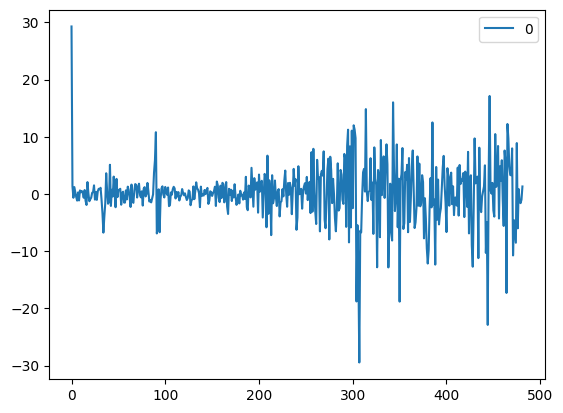

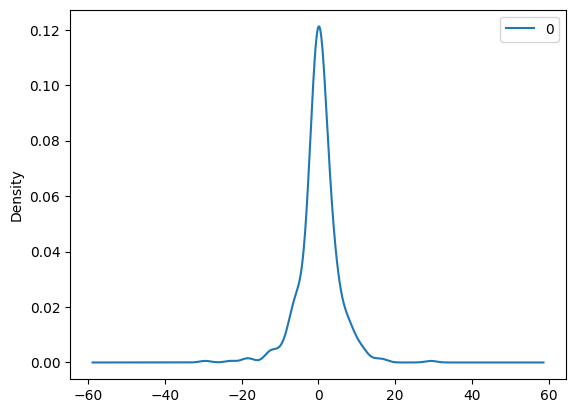

In [169]:
arima_model(data, 3, 1, 1)

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

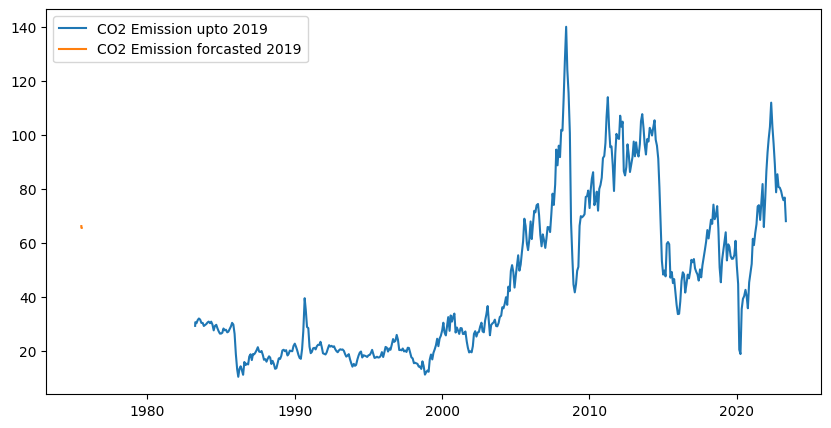

In [179]:
forecast(data,3,1,1,10)

In [116]:
data= pd.read_csv('crudeoilprice.csv')
data['date']= pd.to_datetime(data['date'])
data = data.drop(columns= ['percentChange', 'change'])

In [117]:
data = data.set_index('date')
data.head()

,price
date,
1983-03-30,29.27
1983-04-04,30.63
1983-05-02,30.25
1983-06-01,31.38
1983-07-01,32.00


In [118]:
forecast(data, 3, 1, 1, 3)

KeyError: ignored

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:

import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(data, model='additive',period : int)

trend= decomposition.trend
seasonal= decomposition.seasonal
residual= decomposition.residual

SyntaxError: ignored

In [ ]:
missing= data.isna()
prices_interp = prices.interpolate('linear')

NameError: ignored